In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm
#pd.options.display.max_rows = 50


In [2]:
main_data= pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')

In [3]:
main_data.columns= [item.lower() for item in main_data.columns]

In [4]:
main_data= main_data.rename(columns={'st':'state',"customer lifetime value":"cust_life_val","employmentstatus":"employ_status","monthly premium auto":"month_prem_auto",
                          "number of open complaints":"no_open_compl","number of policies":"no_of_policies","policy type":"policy_type","vehicle class":"veh_class","total claim amount":"tot_claim_amt","vehicle size":"vehicle_size",
                        "vehicle type":"vehicle_type","renew offer type":"renew_off_type","sales channel":"sales_channel","location code":"loc_code","months since last claim":"month_sin_last_claim","months since policy inception":"month_sin_pol_incep",
                        "marital status":"mart_stat"})

In [5]:
main_data

,srno,customer,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,...,no_open_compl,no_of_policies,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/2011,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/2011,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/2011,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/2011,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/2011,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/2011,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/2011,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/2011,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/2011,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
main_data= main_data.drop(columns=["customer"])
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   srno                  10910 non-null  int64  
 1   state                 10279 non-null  object 
 2   cust_life_val         10910 non-null  float64
 3   response              10279 non-null  object 
 4   coverage              10910 non-null  object 
 5   education             10910 non-null  object 
 6   effective to date     10910 non-null  object 
 7   employ_status         10910 non-null  object 
 8   gender                10910 non-null  object 
 9   income                10910 non-null  int64  
 10  loc_code              10910 non-null  object 
 11  mart_stat             10910 non-null  object 
 12  month_prem_auto       10910 non-null  int64  
 13  month_sin_last_claim  10277 non-null  float64
 14  month_sin_pol_incep   10910 non-null  int64  
 15  no_open_compl      

In [7]:
main_data.state.value_counts()

California    3552
Oregon        2909
Arizona       1937
Nevada         993
Washington     888
Name: state, dtype: int64

In [8]:
main_data["state"]= main_data["state"].str.lower()
main_data["education"]= main_data["education"].str.lower()
main_data["policy_type"]= main_data["policy_type"].str.lower()
main_data["policy"]= main_data["policy"].str.lower()
main_data["veh_class"]= main_data["veh_class"].str.lower()
main_data["employ_status"]= main_data["employ_status"].str.lower()
main_data["renew_off_type"]= main_data["renew_off_type"].str.lower()
main_data["sales_channel"]= main_data["sales_channel"].str.lower()
main_data["vehicle_size"]= main_data["vehicle_size"].str.lower()

In [9]:
main_data

,srno,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,...,no_open_compl,no_of_policies,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,0,arizona,4809.216960,No,Basic,college,2/18/2011,employed,M,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,1,california,2228.525238,No,Basic,college,1/18/2011,unemployed,F,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,2,washington,14947.917300,No,Basic,bachelor,2/10/2011,employed,M,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,A
3,3,oregon,22332.439460,Yes,Extended,college,1/11/2011,employed,M,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,A
4,4,oregon,9025.067525,No,Premium,bachelor,1/17/2011,medical leave,F,23675,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,nevada,15563.369440,No,Premium,bachelor,1/19/2011,unemployed,F,0,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,A
10906,10906,oregon,5259.444853,No,Basic,college,1/6/2011,employed,F,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,A
10907,10907,arizona,23893.304100,No,Extended,bachelor,2/6/2011,employed,F,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,10908,california,11971.977650,No,Premium,college,2/13/2011,employed,F,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,A


### Finding and cleaning nan in the data 

In [10]:
main_data["state"]= main_data.state.fillna("Unknown")
main_data

,srno,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,...,no_open_compl,no_of_policies,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,0,arizona,4809.216960,No,Basic,college,2/18/2011,employed,M,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,1,california,2228.525238,No,Basic,college,1/18/2011,unemployed,F,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,2,washington,14947.917300,No,Basic,bachelor,2/10/2011,employed,M,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,A
3,3,oregon,22332.439460,Yes,Extended,college,1/11/2011,employed,M,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,A
4,4,oregon,9025.067525,No,Premium,bachelor,1/17/2011,medical leave,F,23675,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,nevada,15563.369440,No,Premium,bachelor,1/19/2011,unemployed,F,0,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,A
10906,10906,oregon,5259.444853,No,Basic,college,1/6/2011,employed,F,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,A
10907,10907,arizona,23893.304100,No,Extended,bachelor,2/6/2011,employed,F,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,10908,california,11971.977650,No,Premium,college,2/13/2011,employed,F,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,A


In [11]:
main_data["response"]= main_data.response.fillna("Unknown")
main_data

,srno,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,...,no_open_compl,no_of_policies,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,0,arizona,4809.216960,No,Basic,college,2/18/2011,employed,M,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,1,california,2228.525238,No,Basic,college,1/18/2011,unemployed,F,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,2,washington,14947.917300,No,Basic,bachelor,2/10/2011,employed,M,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,A
3,3,oregon,22332.439460,Yes,Extended,college,1/11/2011,employed,M,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,A
4,4,oregon,9025.067525,No,Premium,bachelor,1/17/2011,medical leave,F,23675,...,NaN,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,nevada,15563.369440,No,Premium,bachelor,1/19/2011,unemployed,F,0,...,NaN,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,A
10906,10906,oregon,5259.444853,No,Basic,college,1/6/2011,employed,F,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,A
10907,10907,arizona,23893.304100,No,Extended,bachelor,2/6/2011,employed,F,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,10908,california,11971.977650,No,Premium,college,2/13/2011,employed,F,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,A


In [12]:
average_cust_life_val= np.mean(main_data["cust_life_val"])
main_data["cust_life_val"]= main_data.cust_life_val.fillna(average_cust_life_val)

In [13]:
mode_no_open_compl= 0
main_data["no_open_compl"]= main_data.no_open_compl.fillna(mode_no_open_compl)
main_data

,srno,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,...,no_open_compl,no_of_policies,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,0,arizona,4809.216960,No,Basic,college,2/18/2011,employed,M,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,NaN
1,1,california,2228.525238,No,Basic,college,1/18/2011,unemployed,F,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,NaN
2,2,washington,14947.917300,No,Basic,bachelor,2/10/2011,employed,M,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,A
3,3,oregon,22332.439460,Yes,Extended,college,1/11/2011,employed,M,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,A
4,4,oregon,9025.067525,No,Premium,bachelor,1/17/2011,medical leave,F,23675,...,0.0,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,nevada,15563.369440,No,Premium,bachelor,1/19/2011,unemployed,F,0,...,0.0,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,A
10906,10906,oregon,5259.444853,No,Basic,college,1/6/2011,employed,F,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,A
10907,10907,arizona,23893.304100,No,Extended,bachelor,2/6/2011,employed,F,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,NaN
10908,10908,california,11971.977650,No,Premium,college,2/13/2011,employed,F,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,A


In [14]:
main_data["vehicle_type"]= main_data.vehicle_type.fillna("unknown")
main_data

,srno,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,...,no_open_compl,no_of_policies,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,0,arizona,4809.216960,No,Basic,college,2/18/2011,employed,M,48029,...,0.0,9,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,unknown
1,1,california,2228.525238,No,Basic,college,1/18/2011,unemployed,F,0,...,0.0,1,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,unknown
2,2,washington,14947.917300,No,Basic,bachelor,2/10/2011,employed,M,22139,...,0.0,2,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,A
3,3,oregon,22332.439460,Yes,Extended,college,1/11/2011,employed,M,49078,...,0.0,2,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,A
4,4,oregon,9025.067525,No,Premium,bachelor,1/17/2011,medical leave,F,23675,...,0.0,7,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,nevada,15563.369440,No,Premium,bachelor,1/19/2011,unemployed,F,0,...,0.0,7,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,A
10906,10906,oregon,5259.444853,No,Basic,college,1/6/2011,employed,F,61146,...,0.0,6,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,A
10907,10907,arizona,23893.304100,No,Extended,bachelor,2/6/2011,employed,F,39837,...,0.0,2,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,unknown
10908,10908,california,11971.977650,No,Premium,college,2/13/2011,employed,F,64195,...,4.0,6,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,A


In [15]:
main_data= main_data.drop(columns=["month_sin_last_claim"])
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   srno                 10910 non-null  int64  
 1   state                10910 non-null  object 
 2   cust_life_val        10910 non-null  float64
 3   response             10910 non-null  object 
 4   coverage             10910 non-null  object 
 5   education            10910 non-null  object 
 6   effective to date    10910 non-null  object 
 7   employ_status        10910 non-null  object 
 8   gender               10910 non-null  object 
 9   income               10910 non-null  int64  
 10  loc_code             10910 non-null  object 
 11  mart_stat            10910 non-null  object 
 12  month_prem_auto      10910 non-null  int64  
 13  month_sin_pol_incep  10910 non-null  int64  
 14  no_open_compl        10910 non-null  float64
 15  no_of_policies       10910 non-null 

In [16]:
main_data= main_data.drop(columns=['srno'])
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                10910 non-null  object 
 1   cust_life_val        10910 non-null  float64
 2   response             10910 non-null  object 
 3   coverage             10910 non-null  object 
 4   education            10910 non-null  object 
 5   effective to date    10910 non-null  object 
 6   employ_status        10910 non-null  object 
 7   gender               10910 non-null  object 
 8   income               10910 non-null  int64  
 9   loc_code             10910 non-null  object 
 10  mart_stat            10910 non-null  object 
 11  month_prem_auto      10910 non-null  int64  
 12  month_sin_pol_incep  10910 non-null  int64  
 13  no_open_compl        10910 non-null  float64
 14  no_of_policies       10910 non-null  int64  
 15  policy_type          10910 non-null 

In [17]:
main_data= main_data.drop(columns=['no_of_policies'])
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   state                10910 non-null  object 
 1   cust_life_val        10910 non-null  float64
 2   response             10910 non-null  object 
 3   coverage             10910 non-null  object 
 4   education            10910 non-null  object 
 5   effective to date    10910 non-null  object 
 6   employ_status        10910 non-null  object 
 7   gender               10910 non-null  object 
 8   income               10910 non-null  int64  
 9   loc_code             10910 non-null  object 
 10  mart_stat            10910 non-null  object 
 11  month_prem_auto      10910 non-null  int64  
 12  month_sin_pol_incep  10910 non-null  int64  
 13  no_open_compl        10910 non-null  float64
 14  policy_type          10910 non-null  object 
 15  policy               10910 non-null 

### Splitting X and y

In [18]:
train=main_data.sample(frac=0.25,random_state=200)
main_data.reset_index()
train.reset_index()

,index,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,...,month_sin_pol_incep,no_open_compl,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,5802,arizona,3920.511337,No,Premium,high school or below,2/4/2011,unemployed,F,0,...,55,1.0,personal auto,personal l3,offer3,branch,525.392239,two-door car,large,unknown
1,3381,arizona,9983.128441,No,Extended,college,1/6/2011,unemployed,F,0,...,79,0.0,personal auto,personal l1,offer3,call center,669.600000,four-door car,medsize,A
2,10376,california,7901.744238,No,Basic,high school or below,2/2/2011,unemployed,M,0,...,83,0.0,personal auto,personal l3,offer1,call center,1258.327804,NaN,NaN,A
3,8059,california,4872.016380,No,Basic,master,1/11/2011,unemployed,M,0,...,7,0.0,personal auto,personal l2,offer1,agent,307.200000,NaN,NaN,A
4,4130,oregon,8231.223361,No,Basic,college,1/11/2011,unemployed,F,0,...,70,0.0,personal auto,personal l3,offer1,web,373.073162,suv,medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2723,1233,california,8996.774075,No,Basic,high school or below,2/13/2011,employed,M,49706,...,95,0.0,personal auto,personal l3,offer2,call center,617.515196,suv,medsize,unknown
2724,2789,california,7295.332712,No,Extended,high school or below,2/15/2011,employed,F,34062,...,51,0.0,corporate auto,corporate l3,offer3,agent,603.350571,four-door car,medsize,unknown
2725,9608,arizona,2345.262087,No,Basic,college,2/3/2011,employed,M,51397,...,61,0.0,personal auto,personal l3,offer1,branch,292.800000,four-door car,medsize,unknown
2726,10567,oregon,2854.266940,No,Basic,high school or below,2/10/2011,employed,F,34807,...,90,0.0,personal auto,personal l3,offer1,agent,472.043042,two-door car,small,A


### Correlation matrix 

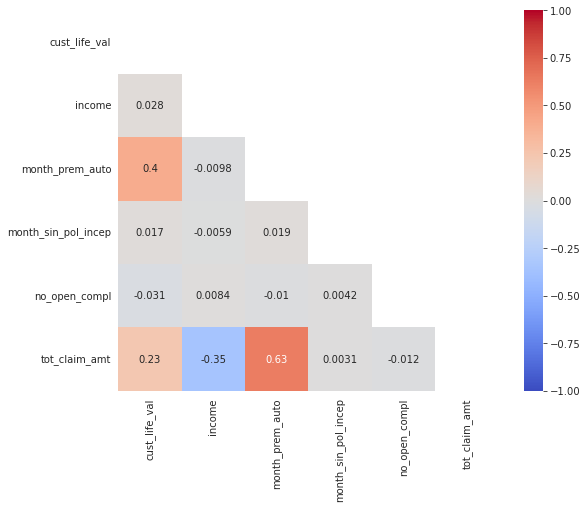

In [19]:
corr = main_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### Predictive modeling

### X Y split 

In [20]:
X=main_data.drop('tot_claim_amt', axis=1)
y= main_data.tot_claim_amt

In [21]:
X=X._get_numeric_data()
X

,cust_life_val,income,month_prem_auto,month_sin_pol_incep,no_open_compl
0,4809.216960,48029,61,52,0.0
1,2228.525238,0,64,26,0.0
2,14947.917300,22139,100,31,0.0
3,22332.439460,49078,97,3,0.0
4,9025.067525,23675,117,31,0.0
...,...,...,...,...,...
10905,15563.369440,0,253,40,0.0
10906,5259.444853,61146,65,68,0.0
10907,23893.304100,39837,201,63,0.0
10908,11971.977650,64195,158,27,4.0


### Standardize 

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30)

In [23]:
std_scaler=StandardScaler().fit(X_train)

X_train_scaled= std_scaler.transform(X_train)
X_test_scaled= std_scaler.transform(X_test)

### Apply regression 

In [24]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

In [25]:
y_pred=model.predict(X_test_scaled)   # model prediction


In [26]:
y_pred

array([533.97908159, 598.66122756, 683.50656918, ..., 522.96879729,
       293.37733326, 541.9786909 ])

In [27]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})

Text(0.5, 1.0, 'Test Set Residual histogram')

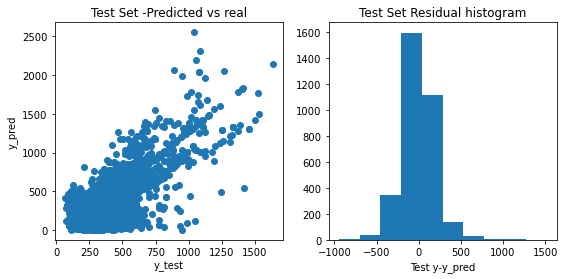

In [28]:

fig, ax = plt.subplots(1,2,figsize=(9,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

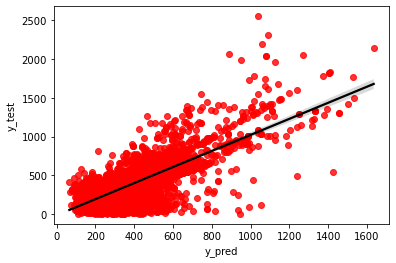

In [29]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Error calculations 

In [30]:
mse(y_test,y_pred)

39142.511859835635

In [31]:
mae(y_test,y_pred)

141.79199617266576

In [32]:
r2_score(y_test,y_pred)

0.5427811429145067

### Feature importance 

In [33]:
np.shape(X_train)

(7637, 5)

In [34]:
features_importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [35]:
features_importances 

,Attribute,Importance
2,month_prem_auto,182.603508
4,no_open_compl,-1.024959
0,cust_life_val,-2.435046
3,month_sin_pol_incep,-5.170839
1,income,-101.307681


### Hot coding Categorical Variables 

In [38]:
categoricals_features= main_data.select_dtypes("object")
categoricals_features

,state,response,coverage,education,effective to date,employ_status,gender,loc_code,mart_stat,policy_type,policy,renew_off_type,sales_channel,veh_class,vehicle_size,vehicle_type
0,arizona,No,Basic,college,2/18/2011,employed,M,Suburban,Married,corporate auto,corporate l3,offer3,agent,four-door car,medsize,unknown
1,california,No,Basic,college,1/18/2011,unemployed,F,Suburban,Single,personal auto,personal l3,offer4,call center,four-door car,medsize,unknown
2,washington,No,Basic,bachelor,2/10/2011,employed,M,Suburban,Single,personal auto,personal l3,offer3,call center,suv,medsize,A
3,oregon,Yes,Extended,college,1/11/2011,employed,M,Suburban,Single,corporate auto,corporate l3,offer2,branch,four-door car,medsize,A
4,oregon,No,Premium,bachelor,1/17/2011,medical leave,F,Suburban,Married,personal auto,personal l2,offer1,branch,four-door car,medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,No,Premium,bachelor,1/19/2011,unemployed,F,Suburban,Married,personal auto,personal l1,offer3,web,luxury car,medsize,A
10906,oregon,No,Basic,college,1/6/2011,employed,F,Urban,Married,personal auto,personal l3,offer2,branch,four-door car,medsize,A
10907,arizona,No,Extended,bachelor,2/6/2011,employed,F,Rural,Married,corporate auto,corporate l3,offer1,web,luxury suv,medsize,unknown
10908,california,No,Premium,college,2/13/2011,employed,F,Urban,Divorced,personal auto,personal l1,offer1,branch,suv,medsize,A


In [40]:
categorical_cols=pd.get_dummies(categoricals_features["coverage"], drop_first=True)
categorical_cols

,Extended,Premium
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
10905,0,1
10906,0,0
10907,1,0
10908,0,1


In [41]:
main_data

,state,cust_life_val,response,coverage,education,effective to date,employ_status,gender,income,loc_code,...,month_sin_pol_incep,no_open_compl,policy_type,policy,renew_off_type,sales_channel,tot_claim_amt,veh_class,vehicle_size,vehicle_type
0,arizona,4809.216960,No,Basic,college,2/18/2011,employed,M,48029,Suburban,...,52,0.0,corporate auto,corporate l3,offer3,agent,292.800000,four-door car,medsize,unknown
1,california,2228.525238,No,Basic,college,1/18/2011,unemployed,F,0,Suburban,...,26,0.0,personal auto,personal l3,offer4,call center,744.924331,four-door car,medsize,unknown
2,washington,14947.917300,No,Basic,bachelor,2/10/2011,employed,M,22139,Suburban,...,31,0.0,personal auto,personal l3,offer3,call center,480.000000,suv,medsize,A
3,oregon,22332.439460,Yes,Extended,college,1/11/2011,employed,M,49078,Suburban,...,3,0.0,corporate auto,corporate l3,offer2,branch,484.013411,four-door car,medsize,A
4,oregon,9025.067525,No,Premium,bachelor,1/17/2011,medical leave,F,23675,Suburban,...,31,0.0,personal auto,personal l2,offer1,branch,707.925645,four-door car,medsize,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,nevada,15563.369440,No,Premium,bachelor,1/19/2011,unemployed,F,0,Suburban,...,40,0.0,personal auto,personal l1,offer3,web,1214.400000,luxury car,medsize,A
10906,oregon,5259.444853,No,Basic,college,1/6/2011,employed,F,61146,Urban,...,68,0.0,personal auto,personal l3,offer2,branch,273.018929,four-door car,medsize,A
10907,arizona,23893.304100,No,Extended,bachelor,2/6/2011,employed,F,39837,Rural,...,63,0.0,corporate auto,corporate l3,offer1,web,381.306996,luxury suv,medsize,unknown
10908,california,11971.977650,No,Premium,college,2/13/2011,employed,F,64195,Urban,...,27,4.0,personal auto,personal l1,offer1,branch,618.288849,suv,medsize,A
